<a href="https://colab.research.google.com/github/risheeee/DJS_Compute_tasks/blob/main/Compute_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing the required Libraries



In [7]:
!pip install pandas numpy matplotlib seaborn --quiet

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Cleaning the data

In [9]:
#reading the csv file into a data frame using pandas
raw_df = pd.read_csv('data2.csv')
pd.set_option('display.max_columns', None)
raw_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
raw_df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [11]:
raw_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
raw_df['education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [13]:
raw_df['relationship'].value_counts()

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [14]:
#checking for the duplicate values
raw_df.duplicated().sum()

24

In [15]:
#as there were 24 duplicate values, wee need to drop them using the drop_duplicates function
raw_df.drop_duplicates(keep = 'first', inplace = True)

In [16]:
raw_df.duplicated().sum()

0

In [17]:
raw_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
#Many values in the dataframe are represented by '?'. So we need to replace them by a 'nan'
raw_df[raw_df == '?'] = np.nan
raw_df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


**THE NEXT STEP IN CLEANING THE DATA IS TO CHECK FOR OUTLIERS**


---


But what are outliers and how can we identfy them?
*   Well, if we talk about English vocabulary, an outlier is a person or a thing different from all members of a particular group.
* But what does an outlier mean here in ML? just changing the above words, an outlier is a data point which is noticibly different from the others
---
So the quiestion arises that how should we identify them.

There are two methods, given as follows
1. The most simplest way to identify an outlier is to plot a '''BoxPlot''' using the seaborn library
2. while the second method uses the '''skew()''' function of python. If the skew value is greater than 1 or less than -1, then the particular column has outliers!




[]

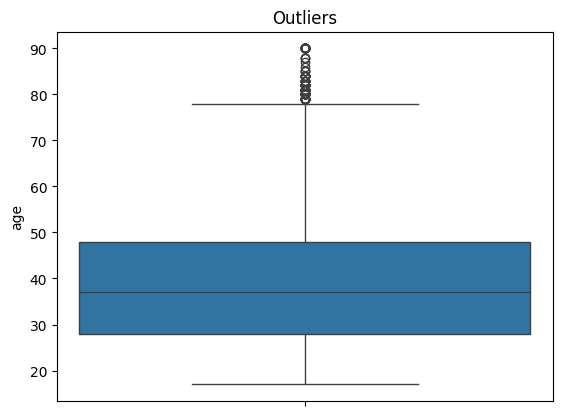

In [20]:
sns.boxplot(data = raw_df['age'])
plt.title('Outliers')
plt.plot()

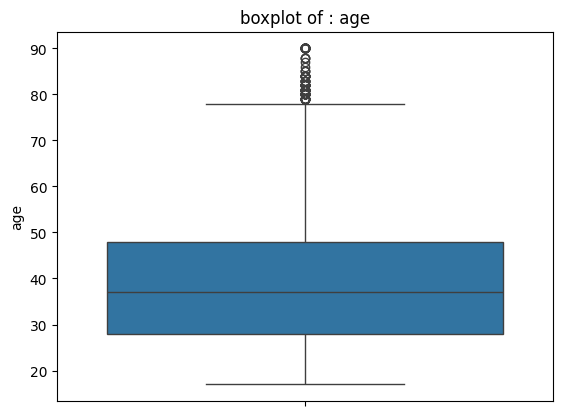

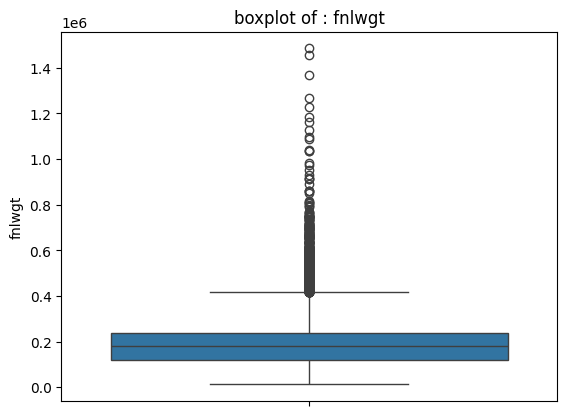

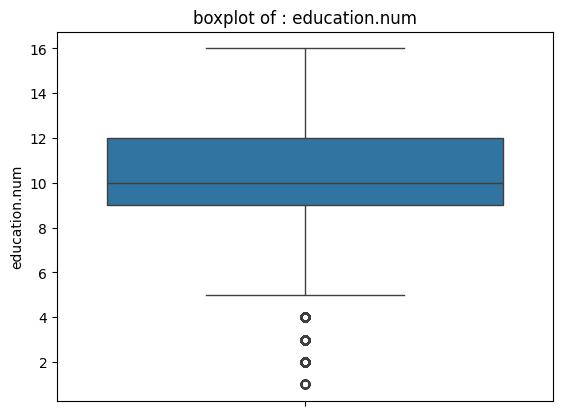

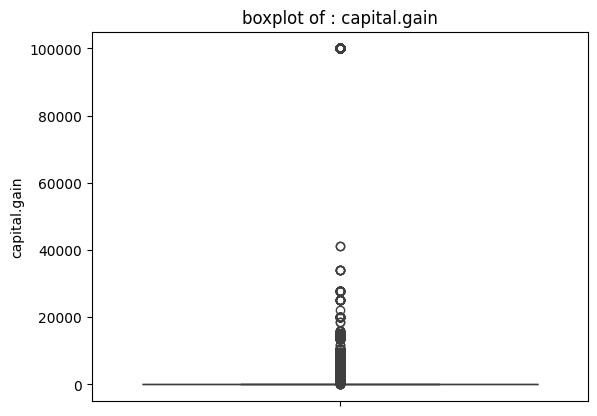

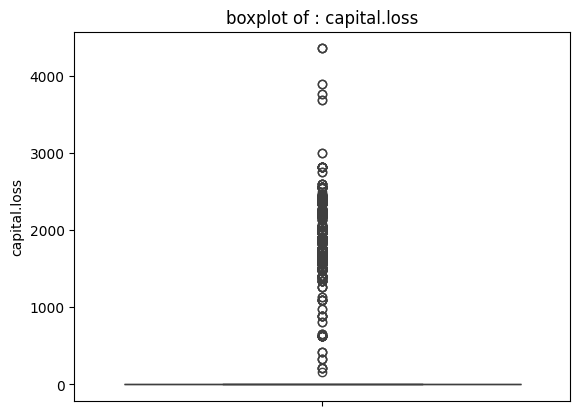

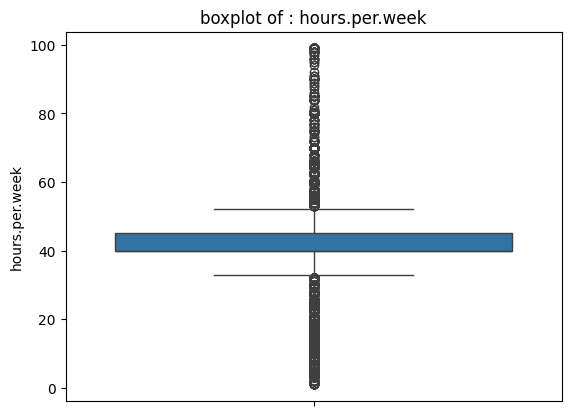

In [21]:
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for col in cols:
  sns.boxplot(data = raw_df[col])
  plt.title(f'boxplot of : {col}')
  plt.show()

 hmm, we have now identified which column contains outliers. So the next step is to work on it



---

We can use the interquantile Range (IQR) to remove the outliers from our data

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

* Q1 represents the 25th percentile of the data.
* Q2 represents the 50th percentile of the data.
* Q3 represents the 75th percentile of the data.

In [22]:
q1 = raw_df['age'].quantile(0.25)
q3 = raw_df['age'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
raw_df['age'].clip(min_range, max_range, inplace = True)
raw_df['age'].skew()

0.513435437493184

In [23]:
q1 = raw_df['fnlwgt'].quantile(0.25)
q3 = raw_df['fnlwgt'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
raw_df['fnlwgt'].clip(min_range, max_range, inplace = True)
raw_df['fnlwgt'].skew()

0.5481580296455432

In [24]:
q1 = raw_df['education.num'].quantile(0.25)
q3 = raw_df['education.num'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
raw_df['education.num'].clip(min_range, max_range, inplace = True)
raw_df['education.num'].skew()

<ipython-input-24-4bd2d3f427b3>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  raw_df['education.num'].clip(min_range, max_range, inplace = True)


-0.03352987895675576

In [25]:
q1 = raw_df['capital.gain'].quantile(0.25)
q3 = raw_df['capital.gain'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
raw_df['capital.gain'].clip(min_range, max_range, inplace = True)
raw_df['capital.gain'].skew()

0.0

In [26]:
q1 = raw_df['capital.loss'].quantile(0.25)
q3 = raw_df['capital.loss'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
raw_df['capital.loss'].clip(min_range, max_range, inplace = True)
raw_df['capital.loss'].skew()

0.0

In [27]:
q1 = raw_df['hours.per.week'].quantile(0.25)
q3 = raw_df['hours.per.week'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
raw_df['hours.per.week'].clip(min_range, max_range, inplace = True)
raw_df['hours.per.week'].skew()

<ipython-input-27-e9b8b9a3ed71>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  raw_df['hours.per.week'].clip(min_range, max_range, inplace = True)


0.4382117683945986

**LETS WORK ON IMPUTING THE MISSING VALUES NOW**

As we can see below, only three columns viz, 'workclass', 'occupation', 'native.country' contains missing columns. to fill the missing values we can do the following things
* either we can take the '''mode''' of the column and fill in the missing value
* or we can drop the missing rows if there arent as many of them

In [28]:
raw_df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [29]:
raw_df['workclass'] = raw_df['workclass'].fillna(raw_df['workclass'].mode()[0])
raw_df['workclass'].isna().sum()

0

In [30]:
raw_df['occupation'] = raw_df['occupation'].fillna(raw_df['occupation'].mode()[0])
raw_df['occupation'].isna().sum()

0

In [31]:
raw_df.dropna(subset = 'native.country', inplace = True)

In [32]:
raw_df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [33]:
raw_df['income'].value_counts()

,count
income,
<=50K,24262
>50K,7693


Since income is our prediction column, it will be better to map the values into 0 and 1 so we can easily work on our model.

In [34]:
raw_df['income'] = raw_df['income'].map({'<=50K' : 0, '>50K' : 1})
raw_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78,Private,77053,HS-grad,9.0,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,40.0,United-States,0
1,78,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,32.5,United-States,0
2,66,Private,186061,Some-college,10.0,Widowed,Prof-specialty,Unmarried,Black,Female,0,0,40.0,United-States,0
3,54,Private,140359,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40.0,United-States,0
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,0,40.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40.0,United-States,0
32557,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,0
32558,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,1
32559,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,0


# 3. Visualizing the Data

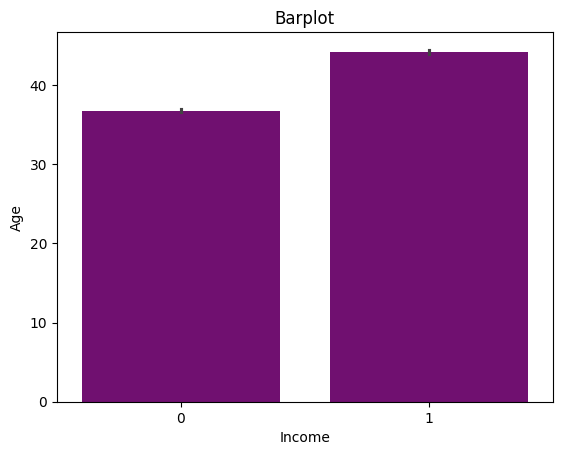

In [35]:
sns.barplot(data = raw_df, x = 'income', y = 'age', color = 'purple')
plt.title('Barplot')
plt.xlabel('Income')
plt.ylabel("Age")
plt.show()

<Figure size 640x480 with 0 Axes>

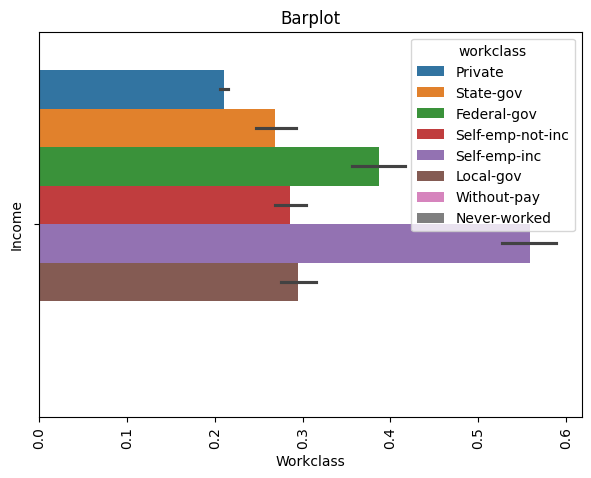

In [36]:
plt.figure()
plt.figure(figsize = (7, 5))
sns.barplot(data = raw_df, x = 'income', hue = 'workclass')
plt.title('Barplot')
plt.xlabel('Workclass')
plt.ylabel("Income")
plt.xticks(rotation = 90)
plt.show()

* We can see that the ''self-emp-inc'' people have the most income followed by people working for ''federal-gov''

<Figure size 640x480 with 0 Axes>

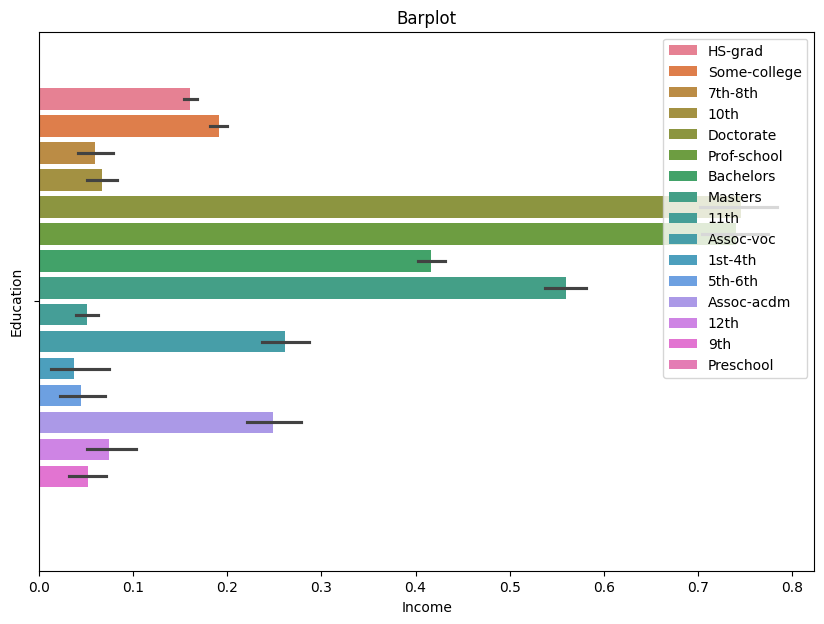

In [37]:
plt.figure()
plt.figure(figsize = (10, 7))
sns.barplot(data = raw_df, x = 'income', hue = 'education', gap = 0.2)
plt.title('Barplot')
plt.xlabel('Income')
plt.ylabel('Education')
plt.legend(loc = 'upper right')
plt.show()

* Visualizing the above graph we  can see that people who have completed their 'Doctorate' and 'Prof-School' have the most income followed by people who have completed their 'Masters'. And as expected we cannot see any plot for the people whove just completed their Preschool.

<Figure size 640x480 with 0 Axes>

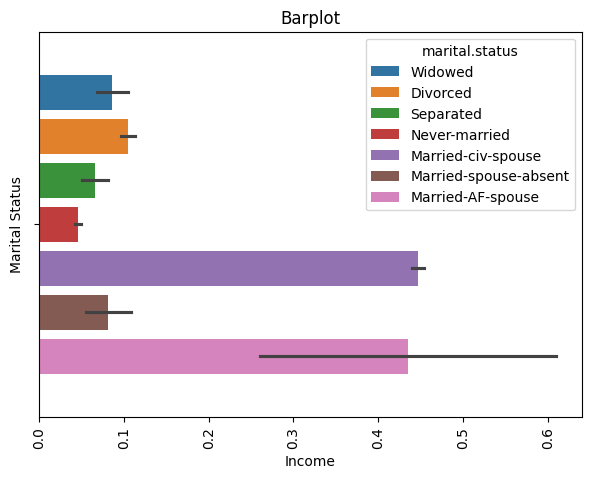

In [38]:
plt.figure()
plt.figure(figsize = (7, 5))
sns.barplot(data = raw_df, x = 'income', hue = 'marital.status', gap = 0.2)
plt.title('Barplot')
plt.ylabel('Marital Status')
plt.xlabel('Income')
plt.xticks(rotation = 90)
plt.show()

* ps - It's better to get married! :-p

<Figure size 640x480 with 0 Axes>

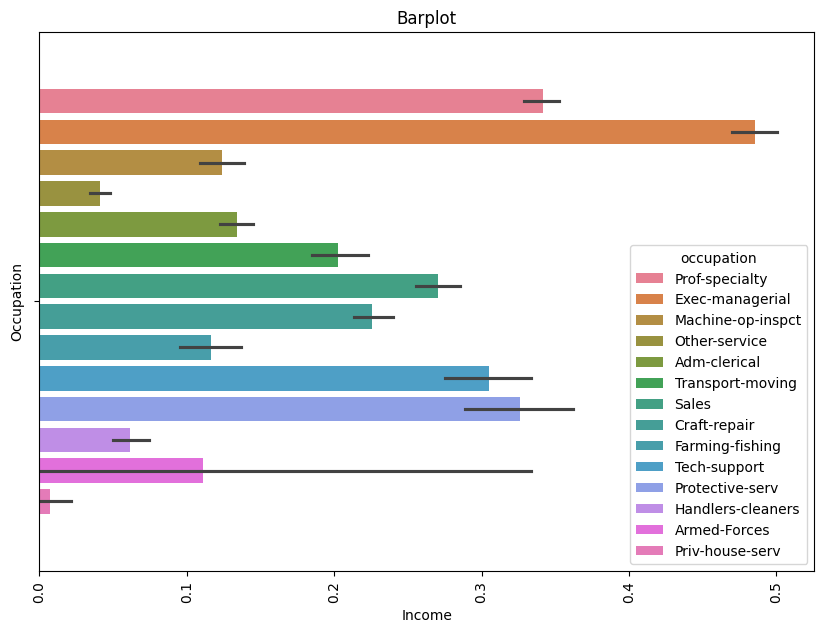

In [39]:
plt.figure()
plt.figure(figsize = (10, 7))
sns.barplot(data = raw_df, x = 'income', hue = 'occupation', gap = 0.2)
plt.title('Barplot')
plt.ylabel('Occupation')
plt.xlabel('Income')
plt.xticks(rotation = 90)
plt.show()

* People working as a 'Exec-managerial' have the most income followed by people working as a 'Prof-speciality' :-o

<Figure size 640x480 with 0 Axes>

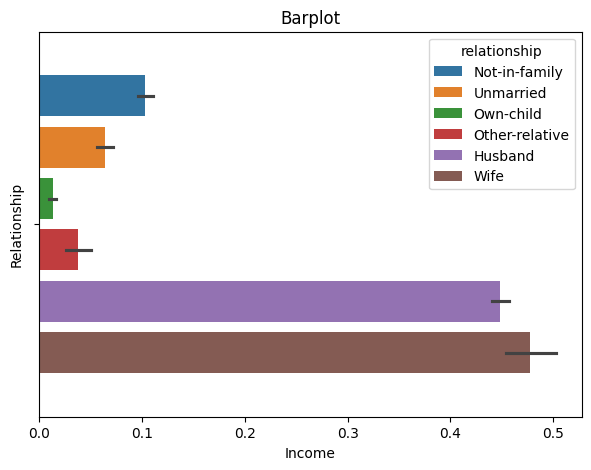

In [40]:
plt.figure()
plt.figure(figsize = (7, 5))
sns.barplot(data = raw_df, x = 'income', hue = 'relationship', gap = 0.2)
plt.title('Barplot')
plt.xlabel('Income')
plt.ylabel('Relationship')
plt.show()

<Figure size 640x480 with 0 Axes>

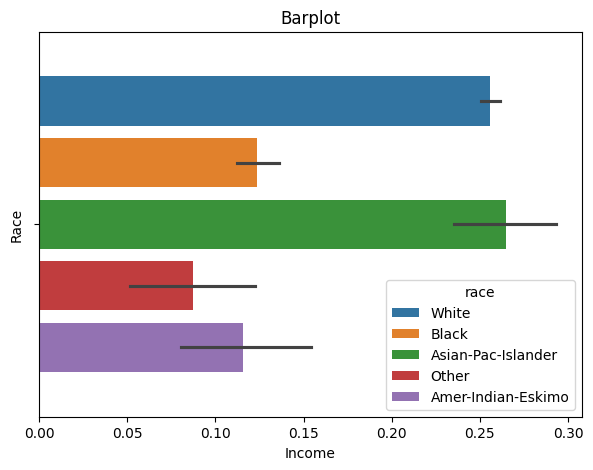

In [41]:
plt.figure()
plt.figure(figsize = (7, 5))
sns.barplot(data = raw_df, x = 'income', hue = 'race', gap = 0.2)
plt.title("Barplot")
plt.xlabel('Income')
plt.ylabel('Race')
plt.show()

* The racism continues...

<Figure size 640x480 with 0 Axes>

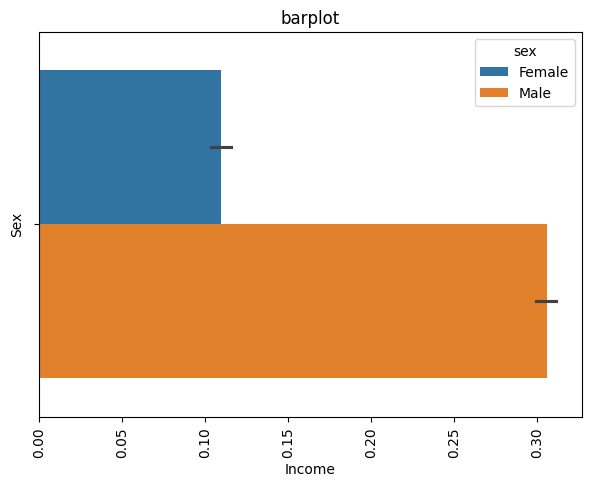

In [42]:
plt.figure()
plt.figure(figsize = (7, 5))
sns.barplot(data = raw_df, x = 'income', hue = 'sex')
plt.title("barplot")
plt.xlabel("Income")
plt.ylabel("Sex")
plt.xticks(rotation = 90)
plt.show()

In [43]:
raw_df['native.country'].value_counts()

,count
native.country,
United-States,29153
Mexico,639
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


<Figure size 640x480 with 0 Axes>

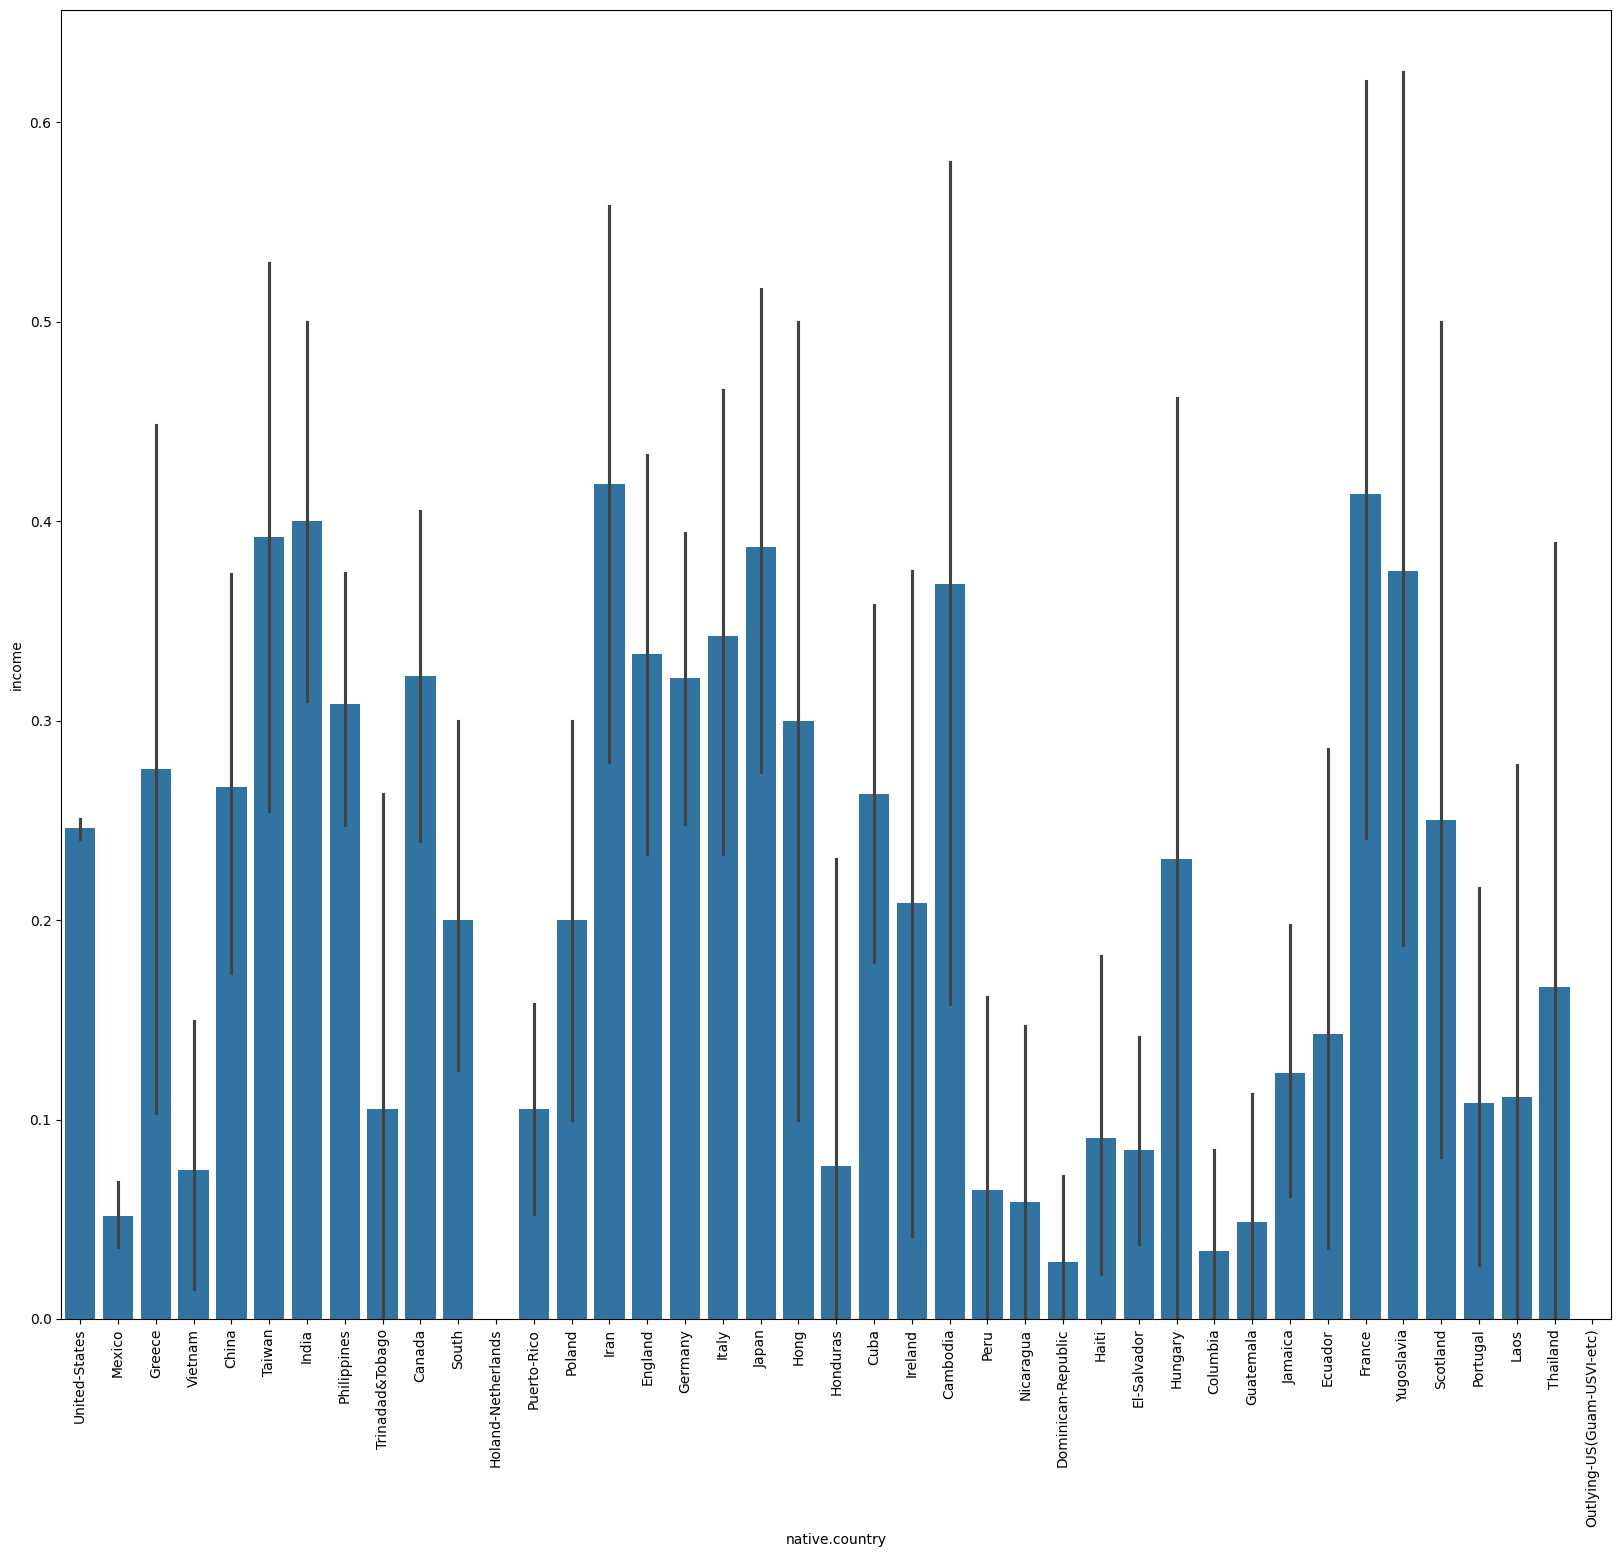

In [44]:
plt.figure()
plt.figure(figsize = (20, 17))
sns.barplot(data = raw_df, x = 'native.country', y = 'income')
plt.xticks(rotation = 90)
plt.show()

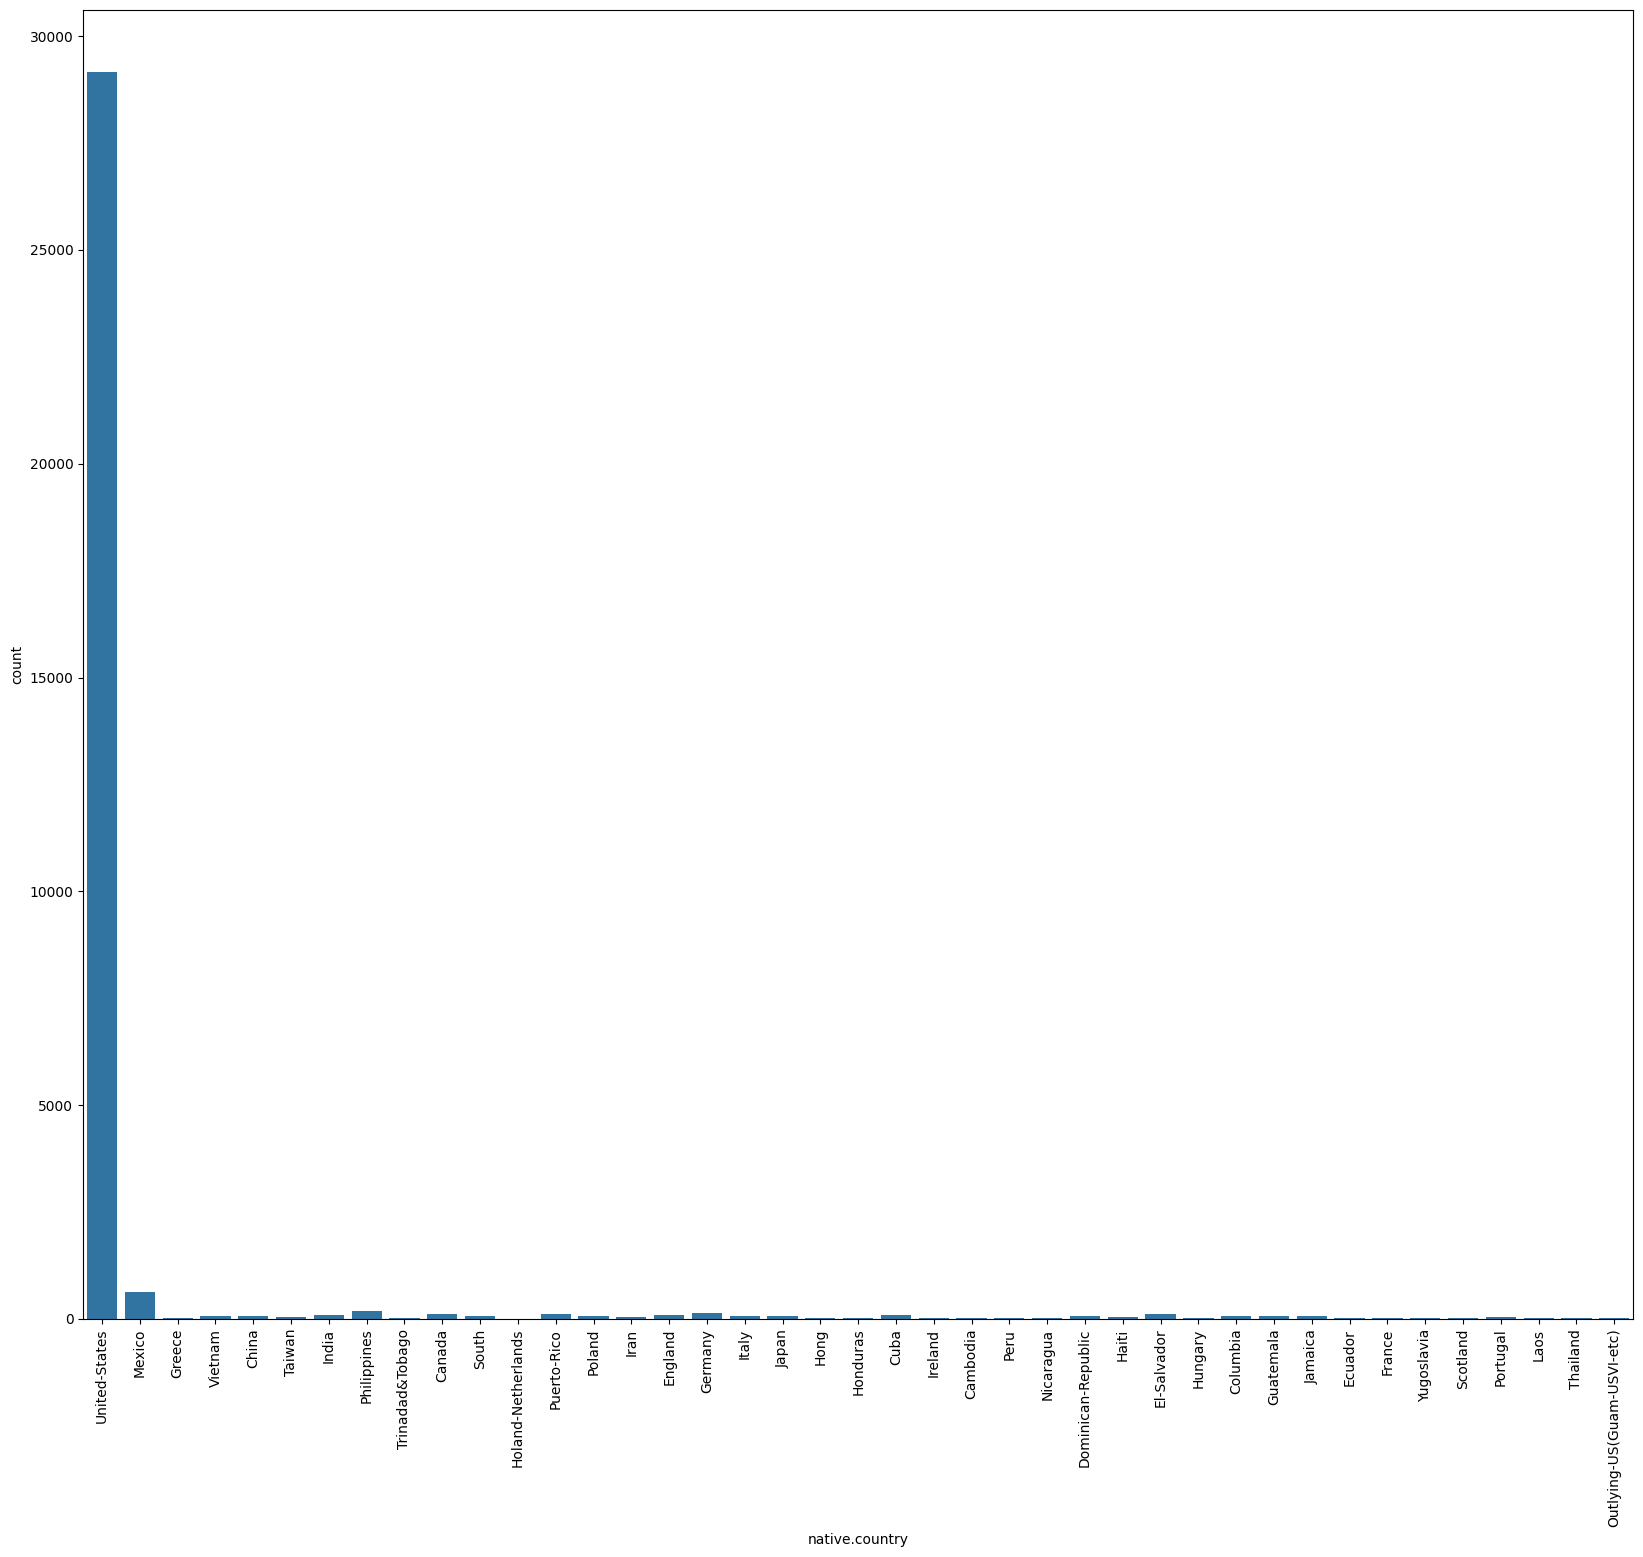

In [45]:
plt.figure(figsize = (20, 17))
sns.countplot(x = 'native.country', data = raw_df)
plt.xticks(rotation = 90)
plt.show()

* From the above few graphs we can conclude that most of the people in the dataframe belong to USA


Finally, we can identify our target and input columns

In [46]:
X = raw_df.drop('income', axis = 1) #input columns
y = raw_df['income'] #target column

In [47]:
y.value_counts()

,count
income,
0,24262
1,7693


# 4. Preprocessing the Data

**THE FIRST STEP IS TO SPLIT THE DATA INTO Training, Validation AND Test SETS**


---
We'll do that using the train_test_split module from sklearn
* We will divide the data such that 60% goes into training set, and 20% goes into validation and test set each
* To do that i have first alloted 20% to test set, that means 80% data will go in the training set from where 20% will go into the validation set


In [48]:
from sklearn.model_selection import train_test_split #importing the train_test_split module from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #checking the shape of our variables after diving the data

((25564, 14), (6391, 14), (25564,), (6391,))

In [50]:
X_val, y_val = X_train[:5000], y_train[:5000] #dividing the training data further into validation

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((25564, 14), (6391, 14), (25564,), (6391,), (5000, 14), (5000,))

**Identify the Categorical and numerical columns**

---
We are doing this so that we can encode the categorical columns and scale the numerical columns afterwords

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25564 entries, 7319 to 5246
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             25564 non-null  int64  
 1   workclass       25564 non-null  object 
 2   fnlwgt          25564 non-null  int64  
 3   education       25564 non-null  object 
 4   education.num   25564 non-null  float64
 5   marital.status  25564 non-null  object 
 6   occupation      25564 non-null  object 
 7   relationship    25564 non-null  object 
 8   race            25564 non-null  object 
 9   sex             25564 non-null  object 
 10  capital.gain    25564 non-null  int64  
 11  capital.loss    25564 non-null  int64  
 12  hours.per.week  25564 non-null  float64
 13  native.country  25564 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 2.9+ MB


In [53]:
categorical_cols = X_train.select_dtypes(include = 'object').columns.tolist()
numerical_cols = X_train.select_dtypes(include = ['int', 'float']).columns.tolist()

In [54]:
numerical_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [55]:
pd.options.mode.copy_on_write = True

In [56]:
#Saving the copy of our variables so that even if we do some wrong modifications we'll get the original data back again

X_train[numerical_cols] = X_train[numerical_cols].copy()
X_test[numerical_cols] = X_test[numerical_cols].copy()
X_val[numerical_cols] = X_val[numerical_cols].copy()

X_train[categorical_cols] = X_train[categorical_cols].copy()
X_test[categorical_cols] = X_test[categorical_cols].copy()
X_val[categorical_cols] = X_val[categorical_cols].copy()

y_train = y_train.copy()
y_test = y_test.copy()
y_val = y_val.copy()

**SCALING THE DATA**

---
We scale the data so that it can help us to balance the contributions of all the variables and build a better model, or else there will be a lot of ambiguity in our model which will later be difficult to overcome

In [57]:
#we will use the MinMaxScaler module from sklearn to scale our numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train[numerical_cols]) #fitting the scaler to our numerical columns
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols]) #applying the scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])

In [58]:
X_val[numerical_cols].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.00000
mean,0.353633,0.430360,0.492026,0.0,0.0,0.42964
std,0.223740,0.235886,0.214176,0.0,0.0,0.30843
min,0.000000,0.017392,0.000000,0.0,0.0,0.00000
25%,0.180328,0.259317,0.391304,0.0,0.0,0.37500
50%,0.327869,0.409221,0.478261,0.0,0.0,0.37500
75%,0.508197,0.553385,0.739130,0.0,0.0,0.62500
max,1.000000,1.000000,1.000000,0.0,0.0,1.00000


* **We can see that our data has been successfully scaled! :-)**


**ENCODING CATEGORICAL COLUMNS**

---
The main reason of encoding out columns is that, a ML model can only train on numerical data and not on the categorical ones. So it is necessary that we encode our categorical columns into 0 and 1 so that we can use them along with aur numerical columns

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) #getting the names of all the different categorical columns present
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-59-22a8da03a938>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
<ipython-input-59-22a8da03a938>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.t

In [60]:
X_train[encoded_cols + numerical_cols]

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Cambodia,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
7319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295082,0.539758,0.000000,0.0,0.0,0.375
20571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.229508,0.270222,0.217391,0.0,0.0,0.375
8853,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.180328,0.541465,0.652174,0.0,0.0,0.375
9946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

# 5. Building Our Model and Hyperparameter Tuning

To begin with, we'll first use a logistic regression model as it is one of the simplest and the best for classification
* Logisitc Regression is an algo used for classifying the data, but the name 'regression' comes from linear regression
* I am using this model first so that we get to know where our model lies and which model should we use next to get better results

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix, f1_score, accuracy_score

In [62]:
model = LogisticRegression(solver = 'liblinear').fit(X_train[encoded_cols + numerical_cols], y_train) #defining and fitting the model

In [63]:
train_pred = model.predict(X_train[encoded_cols + numerical_cols]) #getting the accuracy score for our training data
accuracy_score(y_train, train_pred)

0.8363323423564387

* Well..we're getting 83% accuracy on our training model that's obviously not 'very' good.
* Let us make a confusion matrix so that we can get actual idea of how well our model is performing in terms of actual predictions
* This is what a confusion matrix looks like
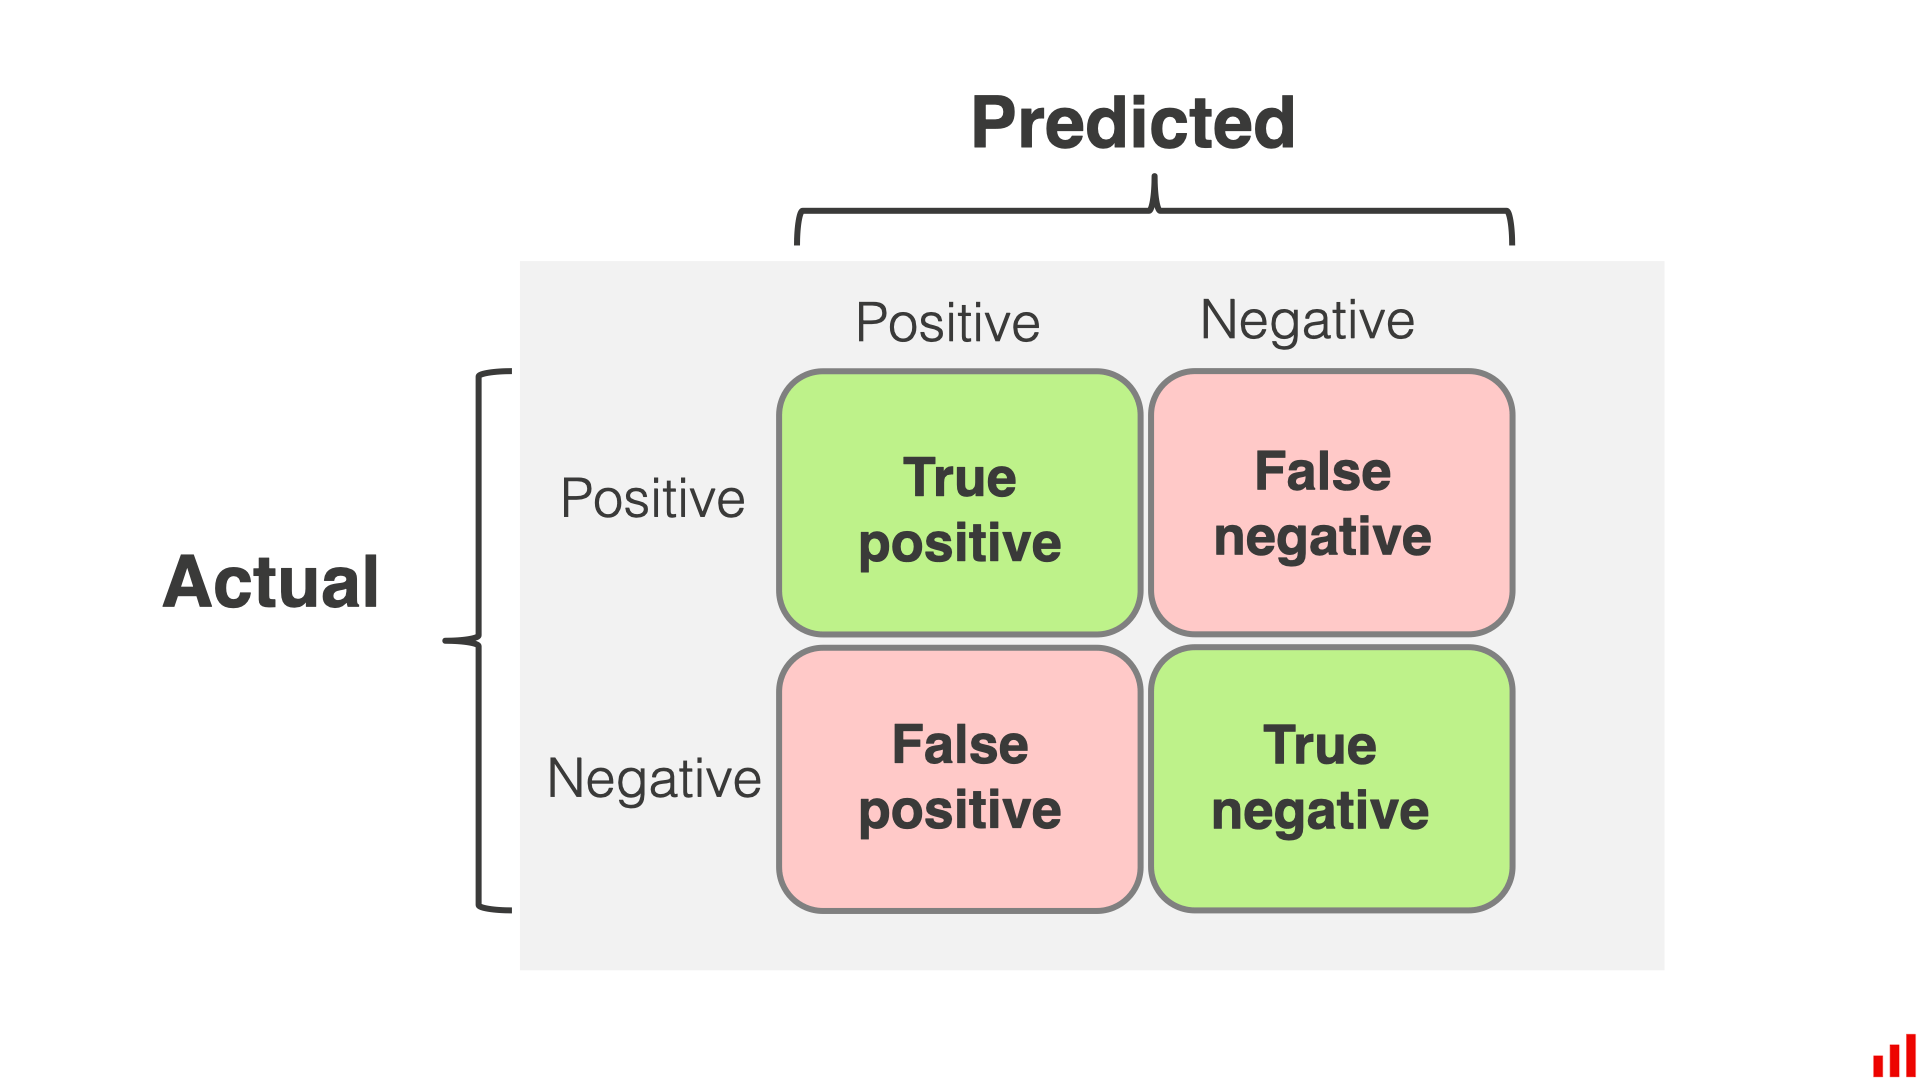

In [64]:
confusion_matrix = confusion_matrix(y_train, train_pred, normalize = 'true')
confusion_matrix

array([[0.92503471, 0.07496529],
       [0.44578904, 0.55421096]])

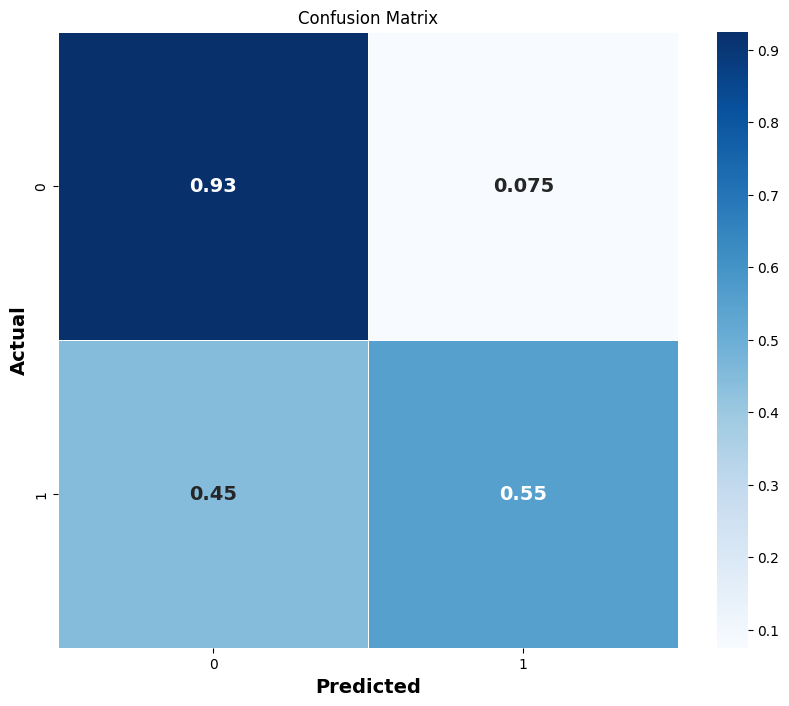

In [65]:
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Blues', annot_kws = {'size': 14, 'weight': 'bold'}, linewidths = .5) #let us visualize it using the seaborn library
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.show()

* So as we can see that our model has a good number of True Positives, but it also has a number of False positives
* It means that in a lot of cases our model has predicted '0' but it actually is '1'
* Hmmm, what can be the reason

In [66]:
y_train.value_counts()

,count
income,
0,19449
1,6115


* As we can see above, our target variable has 3 times the numnber of '0' as compared to the number of ones
* This can be a big reason for the above problem, as it is training on a large number of '0', there is a higher probability that it will predict '0' much mire times as compared to the '1'

**What's the solution?**
* We can solve this problem using the Random over sampling module from imblearn
* Over Sampling simply means that it will target the variable which is less in number and will make it equal to the variable greater in number

In [67]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 27)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
y_train_ros.value_counts()

,count
income,
0,19449
1,19449


In [68]:
model = LogisticRegression(solver = 'liblinear').fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros) #fitting the model
train_pred_ros = model.predict(X_train_ros[encoded_cols + numerical_cols])
accuracy_score(y_train_ros, train_pred_ros) #checking the accuracy

0.8123810992853103

* Well.. the accuracy dropped down, so first lets check on the validation data

In [69]:
train_pred_val = model.predict(X_val[encoded_cols + numerical_cols])
accuracy_score(y_val, train_pred_val)

0.7906

* Lets do some random hyperparamter tuning
* Since were using this algorithm just for testing where our model lies, i wont to much of hyperparameter tuning using randomized search, etc...

In [70]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [71]:
model = LogisticRegression(solver = 'liblinear', C = 20, max_iter = 50, penalty = 'l1').fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros)
train_pred_ros = model.predict(X_train_ros[encoded_cols + numerical_cols])
accuracy_score(y_train_ros, train_pred_ros)

0.8125610571237596

In [72]:
y_val.value_counts()

,count
income,
0,3817
1,1183


* Since we performed random over sampling on our training data, ill do random under sampling on our validation data
* random under sampling takes the variables which is more in number and takes it down to the variable wich is less in number

In [73]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 27)
X_val_rus, y_val_rus = rus.fit_resample(X_val, y_val) #fitting the under sampler to our validation data
y_val_rus.value_counts() #checking the values

,count
income,
0,1183
1,1183


In [74]:
val_pred_rus = model.predict(X_val_rus[encoded_cols + numerical_cols]) #predicitng on the under sampled val data
accuracy_score(y_val_rus, val_pred_rus)

0.8085376162299239

* As you can see that the accuracy on our validation model has increased a bit after performing under sampling!

* **Lets now check the predictions on the test data**

In [75]:
pred_test = model.predict(X_test[encoded_cols + numerical_cols]) #predicting our model on the test data
accuracy_score(y_test, pred_test)

0.787670161164137

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test)) #printing the classification report (to get precision, recall and f1 score)

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      4813
           1       0.55      0.83      0.66      1578

    accuracy                           0.79      6391
   macro avg       0.74      0.80      0.75      6391
weighted avg       0.84      0.79      0.80      6391



 **Summary of Logistic Regression Model**

---
* In simple words, there is scope of improvement since we only got an accuracy of 79%
* So let us train the model on more different algorithms

 **K - Nearest Neighbors**

---
* The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.
* While the KNN algorithm can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.
* This is obviously copied from wiki but thats the reason ill use this algorithm next ;-p

In [77]:
from sklearn.neighbors import KNeighborsClassifier #importing knn classifier from sklearn neighbors
model_knn = KNeighborsClassifier(n_jobs = -1, metric = 'minkowski', n_neighbors=5).fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros) #fitting the model
train_pred_knn = model_knn.predict(X_train_ros[encoded_cols + numerical_cols]) #predicting on the training set
accuracy_score(y_train_ros, train_pred_knn)

0.8869093526659468

* As you can see we got an accuracy of 88%!!, that is surely a boost from our previous model
* let us now check this on our validation set

In [78]:
val_pred_knn = model_knn.predict(X_val_rus[encoded_cols + numerical_cols]) #predicting on the validation set
accuracy_score(y_val_rus, val_pred_knn)

0.8757396449704142

* **Let us get into the hyperparameter tuning, to get us the best results for our model!!**

In [79]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

* To get our job on tuning the hyperparameters done, i am using the Randomized seach module
* I just need to pass in a bunch of few parameters with a bunch of few values and it will give me the best among all of them

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

pipe = Pipeline([('classifier', KNeighborsClassifier())])

param_grid = {
    'classifier__n_neighbors': randint(3, 10),
    'classifier__metric': ['minkowski', 'manhattan', 'euclidean'],
    'classifier__leaf_size': randint(5, 15)
}

random_search = RandomizedSearchCV(pipe, param_distributions = param_grid, n_iter=20, cv=5, verbose=True, n_jobs=-1)
best_param = random_search.fit(X_train_ros[numerical_cols + encoded_cols], y_train_ros)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [82]:
best_param.best_params_ #checking the best params

{'classifier__leaf_size': 9,
 'classifier__metric': 'euclidean',
 'classifier__n_neighbors': 3}

In [83]:
best_param.best_score_ #checking the best score

0.8523064039991659

In [84]:
model_knn = KNeighborsClassifier(n_jobs = -1, metric = 'manhattan', n_neighbors = 10, leaf_size = 17).fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros)
train_pred_knn = model_knn.predict(X_train_ros[encoded_cols + numerical_cols])
accuracy_score(y_train_ros, train_pred_knn)

0.8518432824309733

In [85]:
val_pred_knn = model_knn.predict(X_val_rus[encoded_cols + numerical_cols])
accuracy_score(y_val_rus, val_pred_knn)

0.8415046491969569

* It seems like our accuracy has been falling down after tuning :-(
* Let us check on the test data

In [86]:
test_pred = model_knn.predict(X_test[encoded_cols + numerical_cols])
accuracy_score(y_test, test_pred)

0.7878266312001252

**KNN SUMMARY**

---
* Even though we tuned our model well, we didnt get the required results
* One reason might be that our model is overfitted, but since we did not got a good accuracy even on training and vali data, im not working to reduce the overfittingness of our model
* Instead We can train another model

**Random Forest Classifier**

---
* Random Forest Classification is an ensemble learning technique designed to enhance the accuracy and robustness of classification tasks.
* It creates a set of decision trees from a randomly selected subset of the training set. It is a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction
* Hence ill use this algorithm next!

In [87]:
from sklearn.ensemble import RandomForestClassifier #import rfc from sklearn.ensemble

In [88]:
model_rf = RandomForestClassifier(n_jobs = -1, random_state = 27).fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros) #fitting the model
model.score(X_train_ros[encoded_cols + numerical_cols], y_train_ros)

0.8125610571237596

* We got an accuracy of 81% on our training data
* so now its time to train the hyperparameters
* We'll do it just like before

In [89]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [90]:
pipe = Pipeline([('classifier', RandomForestClassifier())]) #creating a pipeline in which we will pass our random forest

param_grid = {
    'classifier__max_depth' : [5, 15, 25, 35, 45, 55, 65],
    'classifier__n_estimators' : [5, 15, 25, 35, 45, 55, 65],
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_features' : ['sqrt', 'log2', None],
    'classifier__min_samples_split' : [2, 5, 10],
    'classifier__min_samples_leaf' : [1, 2, 4],
    'classifier__bootstrap' : [True, False],
    'classifier__min_impurity_decrease' : [0.0, 0.1, 0.2]
}


random_search = RandomizedSearchCV(pipe, param_distributions = param_grid, n_iter=20, cv=5, verbose=True, n_jobs=-1)
best_param_rf = random_search.fit(X_train_ros[numerical_cols + encoded_cols], y_train_ros)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [91]:
best_param_rf.best_params_ #getting the best params

{'classifier__n_estimators': 65,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 2,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__max_features': 'log2',
 'classifier__max_depth': 35,
 'classifier__criterion': 'entropy',
 'classifier__bootstrap': False}

In [92]:
best_param_rf.best_score_  #getting the best score

0.8594018567555984

In [93]:
model_rf = RandomForestClassifier(n_jobs = -1,
                                  random_state = 27,
                                  n_estimators = 11,
                                  min_samples_split = 2,
                                  max_features = None,
                                  min_impurity_decrease = 0.0,
                                  max_depth = 40,
                                  criterion = 'entropy',
                                  bootstrap = True).fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros) #training using the given set of hyperparameters
train_pred_rf = model_rf.predict(X_train_ros[encoded_cols + numerical_cols])
accuracy_score(y_train_ros, train_pred_rf)

0.9951668466245052

* **WOAAAHHH,** We got an accuracy of 99% on our training data which is definately much much better from our previous models!

In [94]:
val_pred_rf = model_rf.predict(X_val_rus[encoded_cols + numerical_cols]) #checking the accuracy on our validation data
accuracy_score(y_val_rus, val_pred_rf)

0.9940828402366864

* Let us now predict on the test data

In [95]:
test_pred_rf = model_rf.predict(X_test[encoded_cols + numerical_cols])
accuracy_score(y_test, test_pred_rf)

0.810827726490377

* Let us plot the confusion matrix for the same just as we did before

In [96]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, test_pred_rf, normalize = 'true')

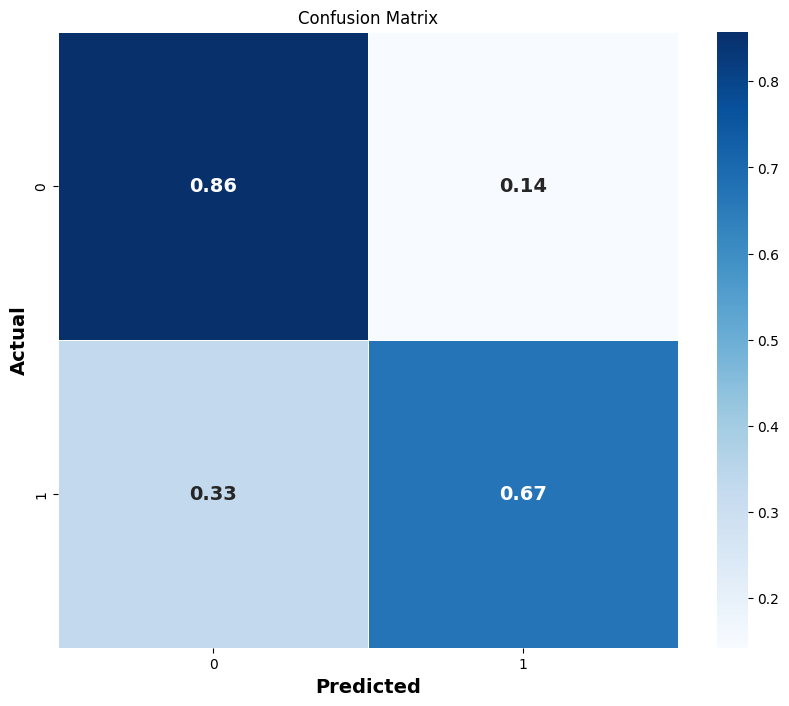

In [97]:
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', annot_kws = {'size': 14, 'weight': 'bold'}, linewidths = .5) #let us visualize it using the seaborn library
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.show()

**Random Forest SUMMARY**

---
* After fitting the model on training, testing, and val data we got a accuracy that was just a little bit better from the last model
* But the thing to note here is the false negatives is relatively less, which is a good thing for our model
* However we wont stop here and train just a last algorithm so that we can comoare these two

**XGBoost Classifier**

---
* XGBoost is a powerful and popular machine learning algorithm that is widely used for classification and regression tasks. It is an implementation of gradient boosted decision trees designed for speed and performance
* It is based on the gradient boosting framework which builds an ensemble of trees sequentially
* XGBoost supports parallel processing, making it faster than many other gradient boosting implementations.

In [98]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_jobs = -1, random_state = 27).fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros)
train_pred_xgb = model_xgb.predict(X_train_ros[encoded_cols + numerical_cols]) #predicting on training data
accuracy_score(y_train_ros, train_pred_xgb)

0.8805851200575865

In [99]:
val_pred_xgb = model_xgb.predict(X_val_rus[encoded_cols + numerical_cols]) #predicting on validation data
accuracy_score(y_val_rus, val_pred_xgb)

0.8732037193575655

* Not bad, we've almost got the same results as before, so lets get onto the hyperparameter tuning

In [100]:
XGBClassifier().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

* We'll train the hyperparameters same as before using Randomized search

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

pipe = Pipeline([('classifier', XGBClassifier())])

param_grid = {
    'classifier__gamma': randint(0, 10),
    'classifier__max_depth': [0, 10, 20, 30, 40, 50, 60],
    'classifier__min_child_weight': randint(0, 15),
    'classifier__subsample' : [0, 0.1, 0.2, 0.3, 0.5, 0.9, 1],
    'classifier__colsample_bytree' : [0, 0.1, 0.2, 0.3, 0.5, 0.9, 1],
    'classifier__lambda' : randint(0, 10)

}

random_search = RandomizedSearchCV(pipe, param_distributions = param_grid, n_iter=20, cv=5, verbose=True, n_jobs=-1)
best_param = random_search.fit(X_train_ros[numerical_cols + encoded_cols], y_train_ros)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [102]:
best_param.best_score_ #getting the best score

0.8639777979802586

In [103]:
best_param.best_params_ #getting the best params

{'classifier__colsample_bytree': 0.3,
 'classifier__gamma': 0,
 'classifier__lambda': 9,
 'classifier__max_depth': 20,
 'classifier__min_child_weight': 6,
 'classifier__subsample': 0.9}

In [108]:
model_xgb = XGBClassifier(n_jobs = -1, random_state = 42, colsample_bytree = 0.9, gamma = 1, reg_lambda = 2, max_depth = 45, subsample = 0.3).fit(X_train_ros[encoded_cols + numerical_cols], y_train_ros)
train_pred_xgb = model_xgb.predict(X_train_ros[encoded_cols + numerical_cols]) #using the given hyperparameters and training our model
accuracy_score(y_train_ros, train_pred_xgb)

0.9606406499048794

In [109]:
val_pred_xgb = model_xgb.predict(X_val_rus[encoded_cols + numerical_cols])
accuracy_score(y_val_rus, val_pred_xgb)

0.9560439560439561

In [110]:
test_pred_xgb = model_xgb.predict(X_test[encoded_cols + numerical_cols]) #predicting on the test set
accuracy_score(y_test, test_pred_xgb)

0.810671256454389

* As we can see that there is hardly any difference between random forest and xgboost's performance
* But let us check the confusion matrix for better summarizing

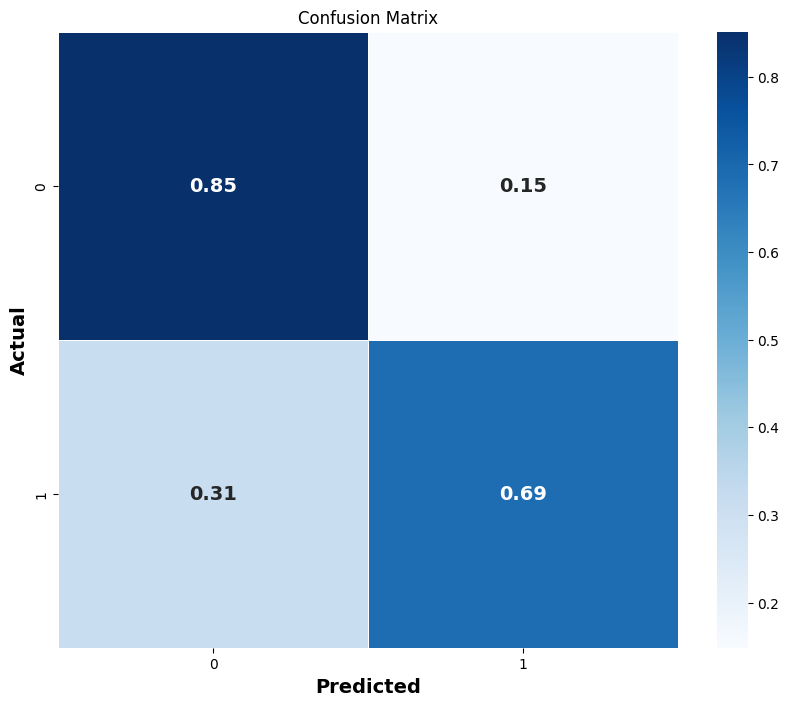

In [111]:
conf_matrix = confusion_matrix(y_test, test_pred_xgb, normalize = 'true')
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', annot_kws = {'size': 14, 'weight': 'bold'}, linewidths = .5) #let us visualize it using the seaborn library
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.show()

**XGBoost SUMMARY**

---
* Seeing the confusion Matrix, one can tell no difference between this and the random forest
* But if we look closely, the confusion matrix is slightly better in this as compared to the Random Forest Classifier
* So we can say that the XGBoost model wins this one as in a real world model the less negatives you have is the better

# **Summary**

### **Data Preprocessing**
- **Reading the Data:** The dataset is read into a Pandas DataFrame.
- **Handling Missing Values:** Missing values are handled appropriately.
- **Encoding Categorical Variables:** Categorical variables are encoded using techniques like one-hot encoding.
- **Splitting the Data:** The dataset is split into training, validation, and test sets.
- **Scaling the Data:** Numerical features are scaled using StandardScaler.

### **Exploratory Data Analysis (EDA)**
- **Visualizations:** Various plots (bar plots, histograms) are created to understand the distribution of features and the target variable.

### **Model Training and Evaluation**
1. **Logistic Regression:**
   - Hyperparameters are tuned using GridSearchCV.
   - The model is trained on the training set and evaluated on the validation set.
   - Performance metrics are calculated, including accuracy, precision, recall, and F1-score.

2. **Random Forest Classifier:**
   - Hyperparameters are tuned using RandomizedSearchCV.
   - The model is trained on the training set and evaluated on the validation set.
   - Performance metrics are calculated.

3. **XGBoost Classifier:**
   - Hyperparameters are tuned using RandomizedSearchCV.
   - The model is trained on the training set and evaluated on the validation set.
   - Performance metrics are calculated.

### **Final Comparison**
- The performance of the Random Forest and XGBoost models is compared using accuracy scores and confusion matrices.
- **Confusion Matrix:** Visualized for better summarization and comparison between models.

### **Key Findings**
- **XGBoost vs. Random Forest:**
  - Both models have similar performance in terms of accuracy.
  - The confusion matrix for XGBoost shows a slight improvement over the Random Forest model, indicating fewer false negatives.
  - XGBoost is declared the better model due to its slightly superior performance in reducing false negatives.

### **To Summarize**
- **Data preprocessing:** Data cleaning, encoding, splitting, and scaling.
- **Model training:** Logistic Regression, Random Forest, and XGBoost.
- **Hyperparameter tuning:** GridSearchCV and RandomizedSearchCV.
- **Model evaluation:** Accuracy, precision, recall, F1-score, and confusion matrices.

### **Conclusion**
- XGBoost is the preferred model due to its slightly better performance in reducing false negatives.